Original training shape: (60000, 28, 28)
Original testing shape: (10000, 28, 28)
Reshaped training shape: (60000, 784)
Reshaped testing shape: (10000, 784)
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8742 - loss: 0.4376 - val_accuracy: 0.9665 - val_loss: 0.1165
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9645 - loss: 0.1148 - val_accuracy: 0.9740 - val_loss: 0.0908
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9778 - loss: 0.0734 - val_accuracy: 0.9758 - val_loss: 0.0863
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9838 - loss: 0.0539 - val_accuracy: 0.9760 - val_loss: 0.0866
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9872 - loss: 0.0410 - val_accuracy: 0.9762 - val_loss: 0.0833
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9899 - loss: 0.0314 - val_accuracy: 0.9740 - val_loss: 0.0961
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accurac

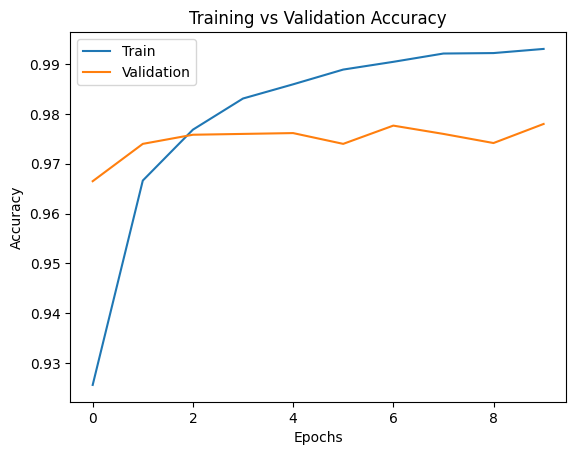

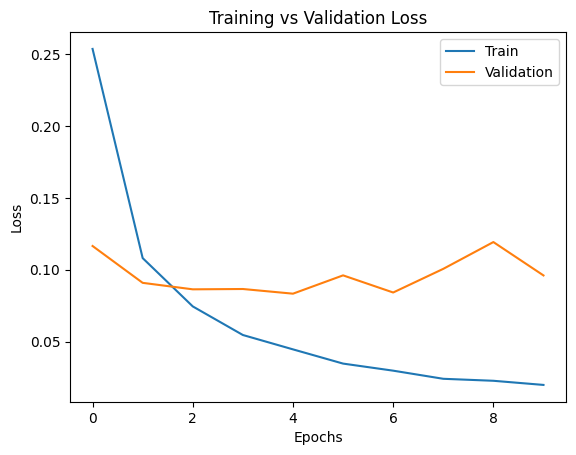

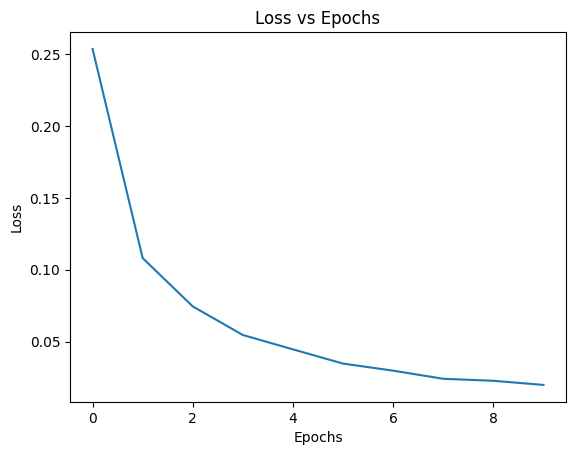


Observations:
The MLP model achieved approximately 97–98% accuracy on the test dataset.
Training and validation accuracy curves are close, indicating minimal overfitting.
Validation accuracy stabilizes after a few epochs, showing good convergence.
Increasing epochs further may not significantly improve performance.


In [3]:


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# -----------------------------
# 1. Load MNIST Dataset
# -----------------------------
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Original training shape:", x_train.shape)
print("Original testing shape:", x_test.shape)

# -----------------------------
# 2. Preprocessing
# Reshape 28x28 -> 784
# Normalize pixel values (0–255 -> 0–1)
# -----------------------------
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

print("Reshaped training shape:", x_train.shape)
print("Reshaped testing shape:", x_test.shape)

# -----------------------------
# 3. MLP Model Architecture
# Input layer: 784 neurons
# Hidden layers: 128, 64 (ReLU)
# Output layer: 10 (Softmax)
# -----------------------------
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# -----------------------------
# 4. Compile Model
# -----------------------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# 5. Train Model
# -----------------------------
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

# -----------------------------
# 6. Evaluate on Test Data
# -----------------------------
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", test_acc)
print("Test Loss:", test_loss)

# -----------------------------
# 7. Visualization (Mandatory)
# -----------------------------

# Plot 1: Training vs Validation Accuracy
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'])
plt.show()

# Plot 2: Training vs Validation Loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'])
plt.show()

# Plot 3: Loss vs Epochs (separate)
plt.figure()
plt.plot(history.history['loss'])
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# -----------------------------
# 8. Observations
# -----------------------------
print("\nObservations:")
print("The MLP model achieved approximately 97–98% accuracy on the test dataset.")
print("Training and validation accuracy curves are close, indicating minimal overfitting.")
print("Validation accuracy stabilizes after a few epochs, showing good convergence.")
print("Increasing epochs further may not significantly improve performance.")
